### Flood Fill
---
An image is represented by an m x n integer grid image where image[i][j] represents the pixel value of the image.

You are also given three integers sr, sc, and color. You should perform a flood fill on the image starting from the pixel image[sr][sc].

To perform a flood fill, consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color), and so on. Replace the color of all of the aforementioned pixels with color.

Return the modified image after performing the flood fill.

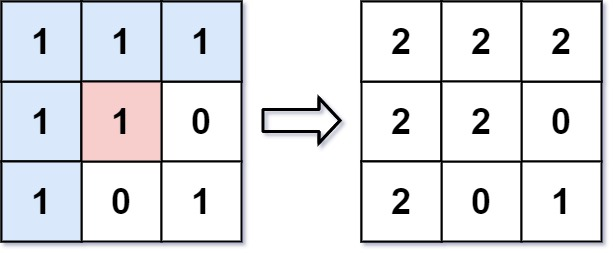

|Input|Output|Explanation|
|:--|:--|:--|
|image = [[1,1,1],[1,1,0],[1,0,1]], sr = 1, sc = 1, color = 2|[[2,2,2],[2,2,0],[2,0,1]]|From the center of the image with position (sr, sc) = (1, 1) (i.e., the red pixel), all pixels connected by a path of the same color as the starting pixel (i.e., the blue pixels) are colored with the new color. Note the bottom corner is not colored 2, because it is not 4-directionally connected to the starting pixel.|
|image = [[0,0,0],[0,0,0]], sr = 0, sc = 0, color = 0|[[0,0,0],[0,0,0]]|The starting pixel is already colored 0, so no changes are made to the image.|
>$Constraints:$  
>- $m == image.length$
>- $n == image[i].length$
>- $1 <= m, n <= 50$
>- $0 <= image[i][j]$, $color < 2^(16)$
>- $0 <= sr < m$
>- $0 <= sc < n$

In [1]:
import java.time.Duration;
import java.time.Instant;

class Solution {
    public int[][] floodFill(int[][] image, int sr, int sc, int color) {
        int rowSize = image.length, colSize = image[0].length, startColor = image[sr][sc];
        int[][] dv = {{-1,0}, {1,0}, {0,-1},{0,1}};
        int[][] visited = new int[rowSize][colSize];
        Queue<Fluid> queue = new LinkedList<>();
        Fluid fluid = new Fluid(sr, sc);
        queue.add(fluid);
        System.out.println(startColor);

        while(!queue.isEmpty()){
            Fluid curFluid = queue.poll();
            int curCol = curFluid.sc, curRow = curFluid.sr;
            if (image[curRow][curCol] == startColor && visited[curRow][curCol] == 0) {
                Arrays.stream(dv).filter(E -> 
                    curRow + E[0] >= 0 && curRow + E[0] < rowSize &&
                    curCol + E[1] >= 0 && curCol + E[1] < colSize)
                    .forEach(E -> queue.add(new Fluid(curRow + E[0], curCol + E[1])));
                image[curRow][curCol] = color;
                visited[curRow][curCol] = 1;
            }
        }

        return image;
    }
}

In [2]:
class Fluid {
    int sr;
    int sc;
    Fluid (int sr, int sc){
        this.sr = sr;
        this.sc = sc;
    }
}

In [8]:
int[][] image = {{1,1,1},{1,1,0},{1,0,1}};
Solution solution = new Solution();

/* Measure execution time */
Instant start = Instant.now();
int[][] answer = solution.floodFill(image,1,1,2);
Instant finish = Instant.now();

Arrays.stream(answer).map(E -> Arrays.toString(E)).forEach(System.out::println);

1
[2, 2, 2]
[2, 2, 0]
[2, 0, 1]


In [9]:
Duration.between(start, finish).toMillis();

22

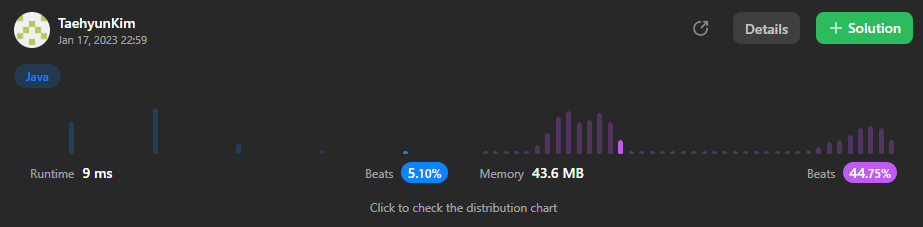

### 0ms||Easy||Java✌
---

In [5]:
class RecursiveSolution {
    public int[][] floodFill(int[][] image, int sr, int sc, int color) {
        int preColor=image[sr][sc];
        if(preColor!=color){
            change(image,sr,sc,color,preColor);
        }
        return image;
    }
    public void change(int[][] image, int sr, int sc, int color,int preColor){
        if(sr<0 ||sc<0 ||sr>=image.length||sc>=image[0].length||image[sr][sc]!=preColor){      //which we should not be done.
            return;
        }
         image[sr][sc]=color;
        change(image,sr+1,sc,color,preColor);
        change(image,sr-1,sc,color,preColor);
        change(image,sr,sc+1,color,preColor);
        change(image,sr,sc-1,color,preColor);
    }
}

In [6]:
RecursiveSolution recursiveSolution = new RecursiveSolution();

/* Measure execution time */
start = Instant.now();
answer = recursiveSolution.floodFill(image,1,1,2);
finish = Instant.now();

Arrays.stream(answer).map(E -> Arrays.toString(E)).forEach(System.out::println);

[2, 2, 2]
[2, 2, 0]
[2, 0, 1]


In [7]:
Duration.between(start, finish).toMillis();

29